In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

df = pd.read_csv('../python_fare_prediction/taxi-fares.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00 UTC,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00 UTC,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,1


In [3]:
df.shape #determing how many rows and columns are in the dataset

(55368, 8)

In [4]:
df.info() #checking for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55368 entries, 0 to 55367
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                55368 non-null  object 
 1   fare_amount        55368 non-null  float64
 2   pickup_datetime    55368 non-null  object 
 3   pickup_longitude   55368 non-null  float64
 4   pickup_latitude    55368 non-null  float64
 5   dropoff_longitude  55368 non-null  float64
 6   dropoff_latitude   55368 non-null  float64
 7   passenger_count    55368 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.4+ MB


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

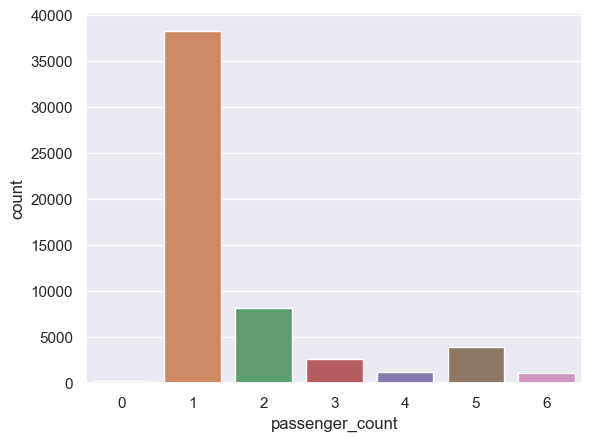

In [6]:
#maing histogram to show how many rows contain one, two or however many passengers were in the car
sns.countplot(x=df['passenger_count'])

In [7]:
#if we want to focus on the rides with one passenger, because most rides contain just one passenger we remove rows where the taxi had more than one passenger
df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065


In [8]:
df.shape

(38233, 6)

In [9]:
#figuring out how much input variables such as latitude and longitude have on the values in the "fare_amount" column
#correlation 
corr_matrix = df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount          1.000000
dropoff_longitude    0.020438
pickup_longitude     0.015742
pickup_latitude     -0.015915
dropoff_latitude    -0.021711
Name: fare_amount, dtype: float64

In [10]:
#the results of the correlation show that the pickup and dropoff distance dont have much to do with the fare amount but it should be.
#we are creating new columns with data from the orginal columns, only this time the day of the week starts at index 0 = Monday, the hours are between 0-23 and the distance covered.
import datetime
from math import sqrt 

for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['pickup_datetime'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6 # 1 degree == 54.6 miles
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
    
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.720497
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.038136
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,2.924341
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,4.862893
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.603493


In [12]:
#now we will drop columns that are not needed to provide a better taxi fare prediction
df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df.head()

,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,0.720497
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493


In [13]:
#here we try to see the correlation to the fare price
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.045873
day_of_week    0.009196
pickup_time   -0.019722
Name: fare_amount, dtype: float64

In [14]:
df.describe()

,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,12.018397
std,9.703149,1.932809,6.446519,217.357022
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.762116
50%,8.500000,3.000000,14.000000,1.331326
75%,12.500000,5.000000,19.000000,2.402226
max,256.000000,6.000000,23.000000,4923.837280


In [15]:
#here we filter the dataset by eliminating negative fare amounts and placing limits on fares and distance 
df= df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.shape

(23298, 4)

In [16]:
#run correlation to see what variables affect the fare amount
corr_matrix = df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount    1.000000
distance       0.851913
day_of_week   -0.003570
pickup_time   -0.023085
Name: fare_amount, dtype: float64

In [17]:
#building training model using regression alogorithms to see what the most accurate results are and from there use a cross-validation to further prove the relationship, we do 
#by starting off with spliting the data for training and testing 

from sklearn.model_selection import train_test_split

x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
#training a linear-regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
#checking the models r-squared score
model.score(x_test, y_test)

0.7203915544390822

In [20]:
#now we check the model against a 5-fold cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7258845061910318

In [21]:
#now we measure the model's mean absolute error (MAE).

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, model.predict(x_test))

2.417690543316923

In [22]:
#training a random forest regressor using the dataset and check accuracy

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(x_train, y_train)

cross_val_score(model, x, y, cv=5).mean()

0.706157807448991

In [24]:
#training the last model using GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
model.fit(x_train, y_train)

cross_val_score(model, x, y, cv=5).mean()

0.750496262408626

In [25]:
#now to determine out of the models which has the highest cross-validated coefficient of determination
#using the trained model to make predictions, we will see the cost to hail a taxi in a 2-mile trip '2.0' at 5pm '17' on friday'4'.

model.predict([[4, 17, 2.0]])

/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([11.33633088])

In [26]:
#lets try predicting the amount for another 2 mile trip at 5pm on saturday
model.predict([[5, 17, 2.0]])

/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([10.79265934])